# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

train = pd.DataFrame(pd.read_csv('../input/train.json'))
test = pd.DataFrame(pd.read_csv('../input/test.json'))

In [1]:
#Import packages

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train = pd.DataFrame(pd.read_json('train.json'))
test = pd.DataFrame(pd.read_json('test.json'))

In [3]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


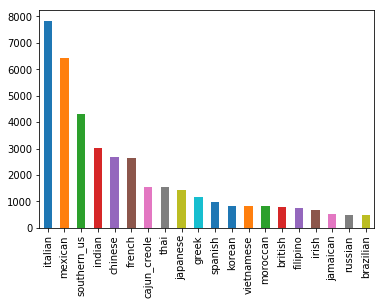

In [4]:
#Check distribution of target values
train['cuisine'].value_counts().plot(kind='bar')

In [5]:
#Import processing and machine learning tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

In [6]:
def text_processing(data): return [" ".join(text).lower() for text in data]

In [7]:
train_features = text_processing(train['ingredients'])
test_features = text_processing(test['ingredients'])

In [8]:
tfidf = TfidfVectorizer(binary=True)

In [9]:
tfidf_train = tfidf.fit_transform(train_features)
y_train = train['cuisine']

tfidf_test = tfidf.transform(test_features)
Id = test['id']

In [10]:
classifier = SVC(C=200, kernel='rbf', degree=3,gamma=1, coef0=1, shrinking=True,tol=0.001, probability=False, 
                 cache_size=200,class_weight=None, verbose=False, max_iter=-1,decision_function_shape=None,random_state=None) 

In [11]:
model = OneVsRestClassifier(classifier)

In [ ]:
scores = cross_val_score(classifier,tfidf_train, y_train, cv=5)
print ("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [12]:
model.fit(tfidf_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [ ]:
predict = model.predict(tfidf_test)

In [ ]:
submission = pd.DataFrame()
submission['ID'] = Id
submission['Cuisine'] = predict

In [ ]:
submission.to_csv('submission.csv', index=False)